![](./graphs/dl_banner.jpg)

# 用tensorflow low level API构建多项式回归模型
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

## 1.引入工具库

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)
import numpy.random as rnd

## 2.设定超参数

In [14]:
# 设定参数
learning_rate = 0.01  # 学习率
epochs = 1000 # 迭代总轮次

## 3.准备数据，设定参数变量

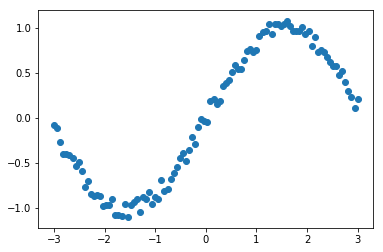

In [18]:
# 产出一部分用于建模学习的数据
n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.1, 0.1, n_observations)
plt.scatter(xs, ys)
plt.show()

In [11]:
# 占位符
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# 设定模型权重
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

## 4.完成模型构建
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [12]:
# 构建多项式回归模型
Y_pred = tf.add(tf.multiply(X, W), b)
#添加高次项
W_2 = tf.Variable(tf.random_normal([1]), name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W_2), Y_pred)
W_3 = tf.Variable(tf.random_normal([1]), name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W_3), Y_pred)

## 5.计算损失与优化器设定

In [15]:
# 计算损失函数
sample_num = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / sample_num
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [16]:
# 初始化计算图中的变量（用默认值去赋值）
init = tf.global_variables_initializer()

## 6.在session当中完成计算图计算(损失计算与优化、参数更新迭代)
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [ ]:
n_samples = xs.shape[0]
with tf.Session() as sess:
	# 记得初始化所有变量
	sess.run(init) 
	writer = tf.summary.FileWriter('./graphs/polynomial_reg', sess.graph)
	
	# 训练模型
	for i in range(epochs):
		total_loss = 0
		for x, y in zip(xs, ys):
			# 通过feed_dic把数据灌进去
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		if i%20 ==0:
			print('第{0}轮数据训练: 当前损失值为{1}'.format(i, total_loss/n_samples))

	# 关闭writer
	writer.close()
    # 取出w和b的值
	W, W_2, W_3, b = sess.run([W, W_2, W_3, b])

In [ ]:
print("W:"+str(W[0]))
print("W_2:"+str(W_2[0]))
print("W_3:"+str(W_3[0]))
print("b:"+str(b[0]))

In [ ]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs*W + np.power(xs,2)*W_2 + np.power(xs,3)*W_3 + b, 'r', label='Predicted data')
plt.legend()
plt.show()

### 版权归 © 稀牛学院 所有 保留所有权利
![](./graphs/xiniu_neteasy.png)